# Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Carregamento dos dados

In [2]:
df = pd.read_csv("/content/EdX.csv")
df

,Name,University,Difficulty Level,Link,About,Course Description
0,How to Learn Online,edX,Beginner,https://www.edx.org/course/how-to-learn-online,Learn essential strategies for successful onli...,"Designed for those who are new to elearning, t..."
1,Programming for Everybody (Getting Started wit...,The University of Michigan,Beginner,https://www.edx.org/course/programming-for-eve...,"This course is a ""no prerequisite"" introductio...",This course aims to teach everyone the basics ...
2,CS50's Introduction to Computer Science,Harvard University,Beginner,https://www.edx.org/course/cs50s-introduction-...,An introduction to the intellectual enterprise...,"This is CS50x , Harvard University's introduct..."
3,The Analytics Edge,Massachusetts Institute of Technology,Intermediate,https://www.edx.org/course/the-analytics-edge,"Through inspiring examples and stories, discov...","In the last decade, the amount of data availab..."
4,Marketing Analytics: Marketing Measurement Str...,"University of California, Berkeley",Beginner,https://www.edx.org/course/marketing-analytics...,This course is part of a MicroMasters® Program,Begin your journey in a new career in marketin...
...,...,...,...,...,...,...
715,Global China: From the Mongols to the Ming,Harvard University,Beginner,https://www.edx.org/course/global-china-from-t...,Explore the impact of the conquest dynasties a...,"In the 13th century, by force of arms, the Mon..."
716,Leaders in Citizen Security and Justice Manage...,Inter-American Development Bank,Intermediate,https://www.edx.org/course/leaders-in-citizen-...,"Learn about the latest in prevention, police a...",The high rates of crime and violence are two o...
717,Computational Neuroscience: Neuronal Dynamics ...,École polytechnique fédérale de Lausanne,Advanced,https://www.edx.org/course/computational-neuro...,This course explains the mathematical and comp...,What happens in your brain when you make a dec...
718,Cities and the Challenge of Sustainable Develo...,SDG Academy,Beginner,https://www.edx.org/course/cities-and-the-chal...,What is a sustainable city? Learn the basics h...,"According to the United Nations, urbanization ..."


#Dimensões do Dataframe

In [3]:
df.shape

(720, 6)

#Colunas

In [23]:
df.columns.tolist()

['Name',
 'University',
 'Difficulty Level',
 'Link',
 'About',
 'Course Description']

#Valores Nulos

In [6]:
df.isnull().sum()

,0
Name,0
University,0
Difficulty Level,0
Link,0
About,0
Course Description,0


#Duplicados

In [7]:
df.duplicated().sum()

np.int64(1)

In [26]:
df[df.duplicated(keep=False)]

,Name,University,Difficulty Level,Link,About,Course Description
46,Introduction to Probability,Harvard University,Intermediate,https://www.edx.org/course/introduction-to-pro...,"Learn probability, an essential language and s...",Probability and statistics help to bring logic...
80,Introduction to Probability,Harvard University,Intermediate,https://www.edx.org/course/introduction-to-pro...,"Learn probability, an essential language and s...",Probability and statistics help to bring logic...


#Tipos de dados

In [8]:
df.dtypes

,0
Name,object
University,object
Difficulty Level,object
Link,object
About,object
Course Description,object


#Cursos por nível de dificuldade

/tmp/ipython-input-3825555423.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Difficulty Level", order=df["Difficulty Level"].value_counts().index, palette="viridis")


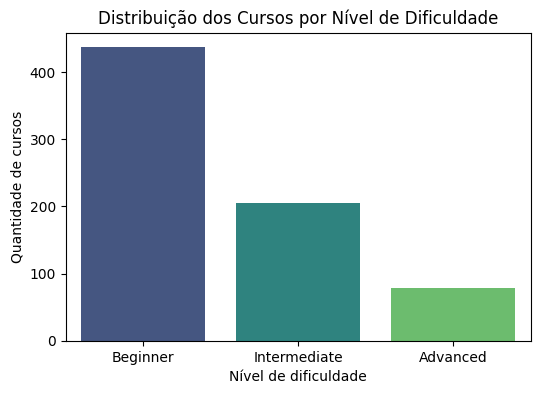

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Difficulty Level", order=df["Difficulty Level"].value_counts().index, palette="viridis")
plt.title("Distribuição dos Cursos por Nível de Dificuldade")
plt.ylabel("Quantidade de cursos")
plt.xlabel("Nível de dificuldade")
plt.show()


# Universidades top (k=10) com mais cursos no nosso dataset

In [33]:
k=10
top_universidades = df["University"].value_counts().head(k)

/tmp/ipython-input-1654810776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_universidades.values, y=top_universidades.index, palette="magma")


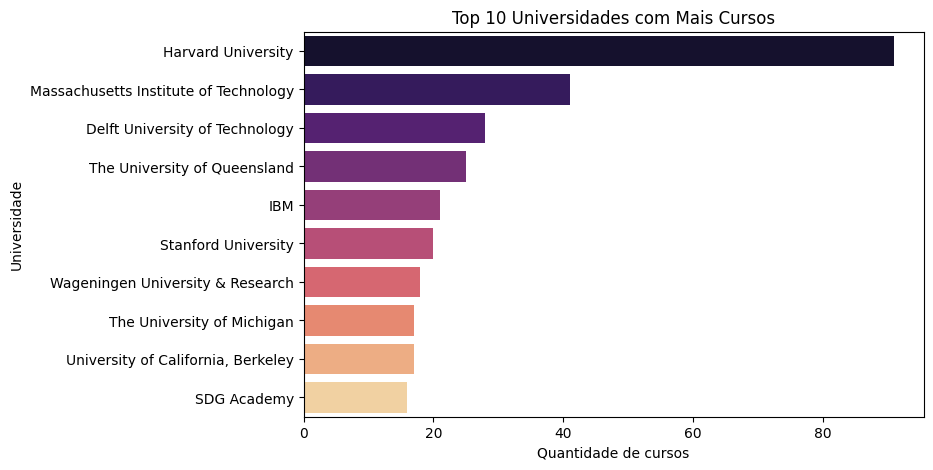

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_universidades.values, y=top_universidades.index, palette="magma")
plt.title(f"Top {k} Universidades com Mais Cursos")
plt.xlabel("Quantidade de cursos")
plt.ylabel("Universidade")
plt.show()

#Análise de texto das descrições do curso

In [13]:
text = " ".join(df["About"].astype(str)) + " " + " ".join(df["Course Description"].astype(str))

In [14]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

# Nuvem de Palavras das descrições dos cursos

In [15]:
wordcloud = WordCloud(width=1000, height=600, background_color="white", stopwords=stopwords, colormap="plasma").generate(text)

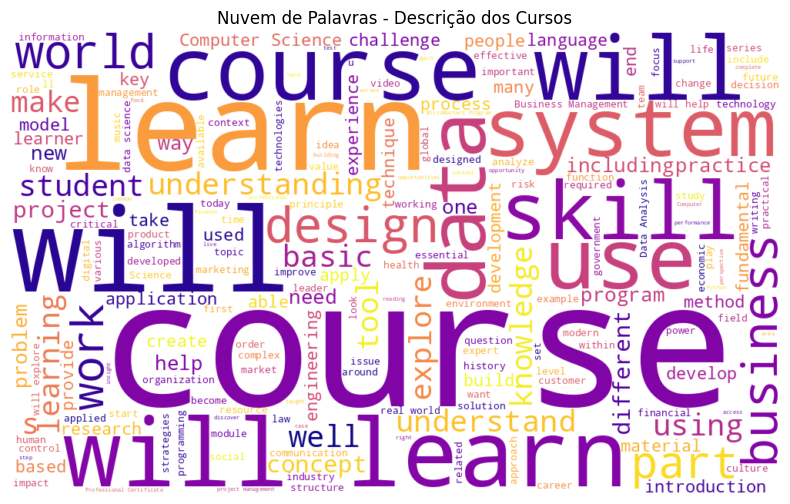

In [16]:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuvem de Palavras - Descrição dos Cursos")
plt.show()


#Palavras mais frequentes

In [17]:
from collections import Counter
import re

In [18]:
tokens = re.findall(r'\b[a-zA-Z]{3,}\b', text.lower())
tokens

['learn',
 'essential',
 'strategies',
 'for',
 'successful',
 'online',
 'learning',
 'this',
 'course',
 'prerequisite',
 'introduction',
 'python',
 'programming',
 'you',
 'will',
 'learn',
 'about',
 'variables',
 'conditional',
 'execution',
 'repeated',
 'execution',
 'and',
 'how',
 'use',
 'functions',
 'the',
 'homework',
 'done',
 'web',
 'browser',
 'you',
 'can',
 'all',
 'the',
 'programming',
 'assignments',
 'phone',
 'public',
 'computer',
 'introduction',
 'the',
 'intellectual',
 'enterprises',
 'computer',
 'science',
 'and',
 'the',
 'art',
 'programming',
 'through',
 'inspiring',
 'examples',
 'and',
 'stories',
 'discover',
 'the',
 'power',
 'data',
 'and',
 'use',
 'analytics',
 'provide',
 'edge',
 'your',
 'career',
 'and',
 'your',
 'life',
 'this',
 'course',
 'part',
 'micromasters',
 'program',
 'learn',
 'the',
 'principles',
 'project',
 'management',
 'and',
 'apply',
 'them',
 'your',
 'own',
 'work',
 'and',
 'life',
 'learn',
 'how',
 'motivate',
 

# Top 20 Palavras Mais Frequentes nas Descrições

In [35]:
k=20
freq = Counter(tokens)
top_words = freq.most_common(k)

In [36]:
freq_df = pd.DataFrame(top_words, columns=["Palavra", "Frequência"])
freq_df

,Palavra,Frequência
0,the,7742
1,and,7247
2,you,2524
3,course,2273
4,will,2137
5,this,1988
6,for,1450
7,how,1371
8,learn,1139
9,with,1029


/tmp/ipython-input-2547237655.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequência", y="Palavra", data=freq_df, palette="coolwarm")


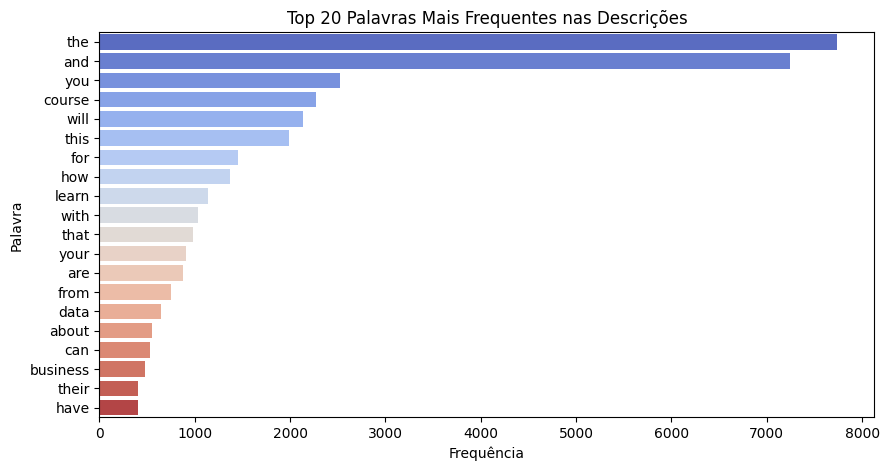

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x="Frequência", y="Palavra", data=freq_df, palette="coolwarm")
plt.title(f"Top {k} Palavras Mais Frequentes nas Descrições")
plt.show()
